In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_genetic import GASearchCV,GAFeatureSelectionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

# **Load dataset**

In [ ]:
DATA=pd.read_csv('/content/creditcard.csv (1).zip')
DATA

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
DATA.shape


(284807, 31)

In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
DATA.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
DATA.drop('Time',inplace=True,axis=1)

In [ ]:
DATA.dtypes

,0
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64
V10,float64


In [ ]:
fraud=DATA[DATA.Class==1]
true=DATA[DATA.Class==0]
true=true.sample(frac=0.5)
card_data=pd.concat([fraud,true])
card_data=card_data.reset_index(drop=True)
card_data.shape

(142650, 30)

In [ ]:
card_data['Amount'].describe()

,Amount
count,142650.000000
mean,87.833798
std,237.882342
min,0.000000
25%,5.490000
50%,22.050000
75%,77.887500
max,19656.530000


# **visualization of dataset**

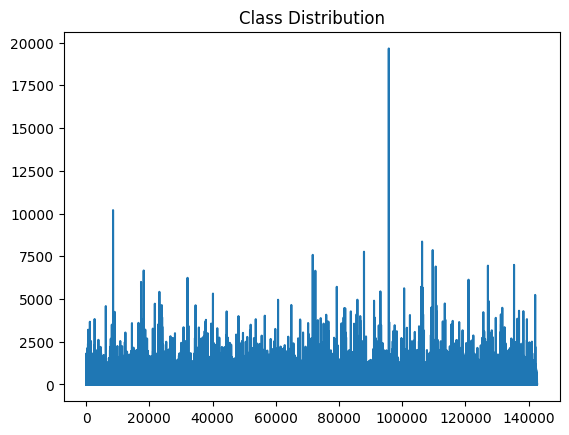

In [ ]:
plt.style.context('ggplot')
plt.figsize=(10,7)
plt.title('Class Distribution')
plt.plot(card_data['Amount'])
plt.show()

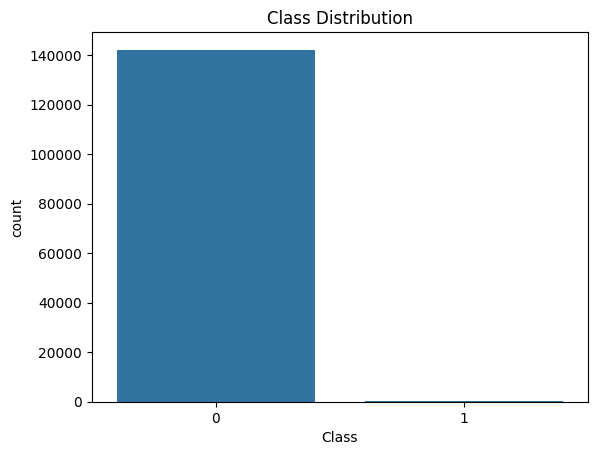

In [ ]:
plt.style.context('ggplot')
plt.figsize=(10,7)
plt.title('Class Distribution')
sns.countplot(x='Class',data=card_data)
plt.show()

# **PERCENTAGE OF FRAUD TRANSACTION**

In [ ]:
percentage=round(len(DATA[DATA.Class==1])/len(DATA[DATA.Class==0])*100,2)
print("The percentage of fraud detection is",percentage ,"%")

The percentage of fraud detection is 0.17 %


In [ ]:
percentage=round(len(fraud)/len(true)*100,2)
print("The percentage of fraud detection is",percentage ,"%")

The percentage of fraud detection is 0.35 %


# **FEATURE SCALING**

In [ ]:
s=StandardScaler()
card_data.Amount=s.fit_transform(card_data.Amount.values.reshape(-1,1))
card_data.Amount

,Amount
0,-0.369233
1,1.854563
2,0.639378
3,-0.121211
4,-0.365030
...,...
142645,-0.148577
142646,-0.360826
142647,-0.270445
142648,-0.358724


In [ ]:
card_data.drop_duplicates(inplace=True)
card_data.shape

(139491, 30)

# **Split Data into Training & Testing Sets**

In [ ]:
x=card_data.drop('Class',axis=1)
y=card_data['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(97643, 29)
(41848, 29)
(97643,)
(41848,)


# **MODEL : LOGISTIC REGRESSION**

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions
pred1 = model_lr.predict(x_test)
# Print accuracy
print(accuracy_score(y_test,pred1))

0.9988768877843625


# **Confusion Matrix**

<Axes: >

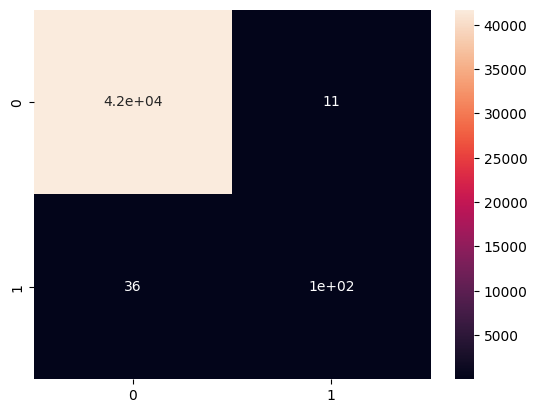

In [ ]:
plt.style.context('ggplot')
sns.heatmap(confusion_matrix(y_test,pred1),annot=True)

# **F1 SCORE**

In [ ]:
print(round(f1_score(y_test,pred1),2))

0.82


# **MODEL : RANDOM FOREST CLASSIFIER**

In [ ]:
model_rc = RandomForestClassifier()
model_rc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions
pred2 = model_rc.predict(x_test)
# Print accuracy
print(accuracy_score(y_test,pred1))

0.9988768877843625


<Axes: >

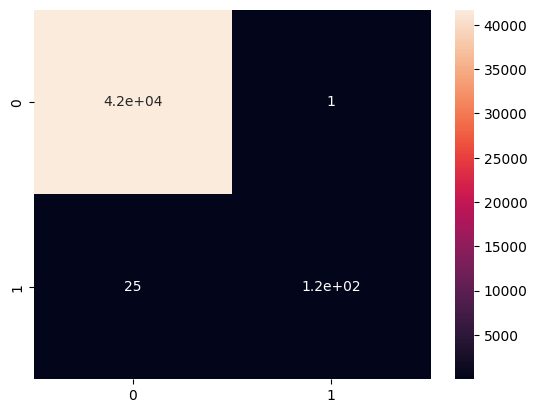

In [ ]:
plt.style.context('ggplot')
sns.heatmap(confusion_matrix(y_test,pred2),annot=True)

# **F1 SCORE**

In [ ]:
print(round(f1_score(y_test,pred2),2))

0.9


# **USING GENETIC ALGORITHM WITH LOGISTIC REGRESSION**

In [ ]:
estimator_log = LogisticRegression()
model_ga = GAFeatureSelectionCV(
    estimator=estimator_log,
    cv=5,
    verbose=1,
    scoring="accuracy",
    max_features=5,

)
model_ga.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	-39999.4	48990.3    	0.998556   	-100000    
1  	100   	-35999.4	48000.5    	0.998464   	-100000    
2  	100   	-47999.5	49960.5    	0.998464   	-100000    
3  	100   	-49999.5	50000.5    	0.998464   	-100000    
4  	100   	-61999.6	48539.1    	0.998464   	-100000    
5  	100   	-67999.7	46648.1    	0.998464   	-100000    
6  	100   	-69999.7	45826.2    	0.998464   	-100000    
7  	100   	-73999.7	43863.9    	0.998464   	-100000    
8  	100   	-71999.7	44900.3    	0.998464   	-100000    
9  	100   	-59999.6	48990.3    	0.998464   	-100000    
10 	100   	-71999.7	44900.3    	0.998484   	-100000    
11 	100   	-69999.7	45826.2    	0.998484   	-100000    
12 	100   	-59999.6	48990.3    	0.998484   	-100000    
13 	100   	-61999.6	48539.1    	0.998484   	-100000    
14 	100   	-57999.6	49356.3    	0.998484   	-100000    
15 	100   	-55999.6	49639.2    	0.998484   	-100000    
16 	100   	-59999.6	48990.3    	0.998484   	-100

GAFeatureSelectionCV(cv=5, estimator=LogisticRegression(), max_features=5,
                     scoring='accuracy', verbose=1)

In [ ]:
# Make predictions
pred3 = model_ga.predict(x_test)
# Print accuracy
print("Accuracy:", accuracy_score(y_test, pred3))

Accuracy: 0.9988768877843625


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GAFeatureSelectionCV was fitted without feature names
  warnings.warn(


<Axes: >

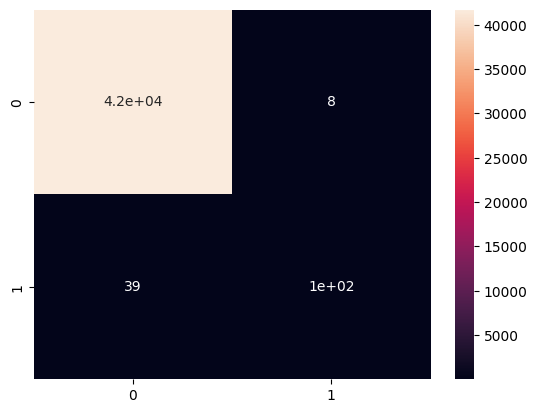

In [ ]:
plt.style.context('ggplot')
sns.heatmap(confusion_matrix(y_test,pred3),annot=True)

In [ ]:
feature_names = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Function to get user input and test models
def test_with_user_input(models, feature_names, scaler):
    print("Enter values for a single credit card transaction to test for fraud.")
    print("For simplicity, enter approximate values for each feature (e.g., between -5 and 5 for V1-V28, and raw Amount).")
    print("Note: 'Amount' will be scaled automatically using the trained scaler.\n")

    # Collect user input
    user_data = {}
    for feature in feature_names:
        if feature == 'Amount':
            value = float(input(f"Enter {feature} (e.g., transaction amount like 100.50): "))
        else:
            value = float(input(f"Enter {feature} (e.g., between -5 and 5): "))
        user_data[feature] = value

    # Convert to DataFrame
    input_df = pd.DataFrame([user_data], columns=feature_names)

    # Scale the 'Amount' feature using the trained scaler (s)
    input_df['Amount'] = scaler.transform(input_df['Amount'].values.reshape(-1, 1))

    # Test each model
    for model, name in models:
        prediction = model.predict(input_df)
        print(f"\nPrediction from {name}: {'Fraud' if prediction[0] == 1 else 'Not Fraud'}")

# Models to test
models_to_test = [
    (model_lr, "Logistic Regression"),
    (model_rc, "Random Forest Classifier"),
    (model_ga, "GA with Logistic Regression")
]

# Run the test with user input
test_with_user_input(models_to_test, feature_names, s)

Enter values for a single credit card transaction to test for fraud.
For simplicity, enter approximate values for each feature (e.g., between -5 and 5 for V1-V28, and raw Amount).
Note: 'Amount' will be scaled automatically using the trained scaler.

Enter V1 (e.g., between -5 and 5): 0.2
Enter V2 (e.g., between -5 and 5): 3.2
Enter V3 (e.g., between -5 and 5): -2
Enter V4 (e.g., between -5 and 5): -1
Enter V5 (e.g., between -5 and 5): -3
Enter V6 (e.g., between -5 and 5): -4
Enter V7 (e.g., between -5 and 5): -4.25
Enter V8 (e.g., between -5 and 5): 2.36
Enter V9 (e.g., between -5 and 5): 5
Enter V10 (e.g., between -5 and 5): 1.25
Enter V11 (e.g., between -5 and 5): 0.95623
Enter V12 (e.g., between -5 and 5): 2.364
Enter V13 (e.g., between -5 and 5): 1.25
Enter V14 (e.g., between -5 and 5): 9.56
Enter V15 (e.g., between -5 and 5): 3.
Enter V16 (e.g., between -5 and 5): 3.25
Enter V17 (e.g., between -5 and 5): 3.0
Enter V18 (e.g., between -5 and 5): 2.69
Enter V19 (e.g., between -5 and

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GAFeatureSelectionCV was fitted without feature names
  warnings.warn(
